# LeNet-5
This is an implementation of the LeNet-5 CNN to classify the MNIST dataset.


# Imports

In [4]:
import torch
import torchvision
import numpy as np
import matplotlib.pyplot as plt

from cnn.helpers.helper_evaluation import set_all_seeds, set_deterministic
from cnn.helpers.helper_train import train_model
from cnn.helpers.helper_datasets import get_dataloaders_mnist
from cnn.helpers.helper_plotting import plot_training_loss, plot_accuracy, show_examples

# Settings and Dataset

In [6]:
RANDOM_SEED = 123
BATCH_SIZE = 256
NUM_EPOCHS = 15
DEVICE = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

In [7]:
set_all_seeds(RANDOM_SEED)

In [9]:
##########################
### MNIST DATASET
##########################

resize_transform = torchvision.transforms.Compose(
    [torchvision.transforms.Resize((32, 32)),
     torchvision.transforms.ToTensor(),
     torchvision.transforms.Normalize((0.5,), (0.5,))])


train_loader, valid_loader, test_loader = get_dataloaders_mnist(
    batch_size=BATCH_SIZE,
    validation_fraction=0.1,
    train_transforms=resize_transform,
    test_transforms=resize_transform)

# Checking the dataset
for images, labels in train_loader:  
    print('Image batch dimensions:', images.shape)
    print('Image label dimensions:', labels.shape)
    print('Class labels of 10 examples:', labels[:10])
    break

Failed to download (trying next):
HTTP Error 403: Forbidden



100.0%


Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100.0%


Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100.0%


Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100.0%

Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw

Image batch dimensions: torch.Size([256, 1, 32, 32])
Image label dimensions: torch.Size([256])
Class labels of 10 examples: tensor([8, 1, 1, 3, 6, 6, 8, 8, 8, 1])


# Model

In [17]:
class LeNet5(torch.nn.Module):
    def __init__(self, num_classes, gray_scale=False):
        super().__init__()
        
        self.num_classes = num_classes
        self.grayscale = gray_scale
        
        if self.grayscale:
            in_channels = 1
        else:
            in_channels = 3
            
        self.features = torch.nn.Sequential(
            # conv 1
            torch.nn.Conv2d(in_channels, out_channels=6, kernel_size=5),
            torch.nn.Tanh(),
            torch.nn.MaxPool2d(kernel_size=2),
            # conv 2
            torch.nn.Conv2d(in_channels=6, out_channels=16, kernel_size=5),
            torch.nn.Tanh(),
            torch.nn.MaxPool2d(kernel_size=2)
        )
        
        self.classifier = torch.nn.Sequential(
            torch.nn.Linear(16*5*5, 120),
            torch.nn.Tanh(),
            torch.nn.Linear(120, 84),
            torch.nn.Tanh(),
            torch.nn.Linear(84, num_classes)
        )
    
    def forward(self, x):
        x = self.features(x)
        x = torch.flatten(x, 1)
        logits = self.classifier(x)
        return logits

Epoch: 001/015 | Batch 0000/0210 | Loss: 2.2987
Epoch: 001/015 | Batch 0100/0210 | Loss: 0.5120
Epoch: 001/015 | Batch 0200/0210 | Loss: 0.2529
Epoch: 001/015 | Train: 92.05% | Validation: 93.60%
Time elapsed: 0.33 min
Epoch: 002/015 | Batch 0000/0210 | Loss: 0.2686
Epoch: 002/015 | Batch 0100/0210 | Loss: 0.1771
Epoch: 002/015 | Batch 0200/0210 | Loss: 0.2023
Epoch: 002/015 | Train: 95.45% | Validation: 96.42%
Time elapsed: 0.67 min
Epoch: 003/015 | Batch 0000/0210 | Loss: 0.1667
Epoch: 003/015 | Batch 0100/0210 | Loss: 0.0723
Epoch: 003/015 | Batch 0200/0210 | Loss: 0.1232
Epoch: 003/015 | Train: 96.81% | Validation: 97.23%
Time elapsed: 0.99 min
Epoch: 004/015 | Batch 0000/0210 | Loss: 0.1097
Epoch: 004/015 | Batch 0100/0210 | Loss: 0.0928
Epoch: 004/015 | Batch 0200/0210 | Loss: 0.0902
Epoch: 004/015 | Train: 97.50% | Validation: 97.70%
Time elapsed: 1.33 min
Epoch: 005/015 | Batch 0000/0210 | Loss: 0.0608
Epoch: 005/015 | Batch 0100/0210 | Loss: 0.0740
Epoch: 005/015 | Batch 0200/

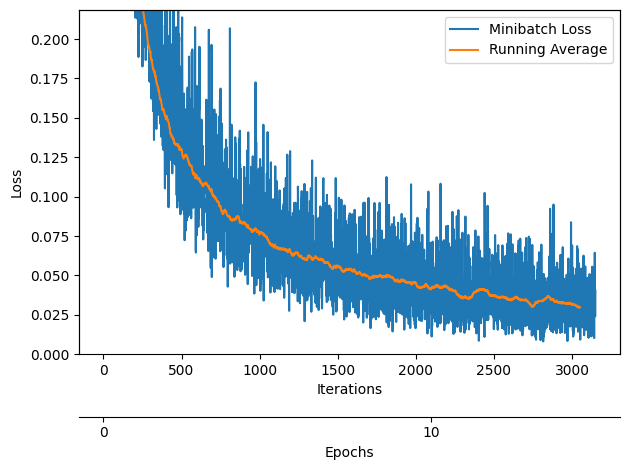

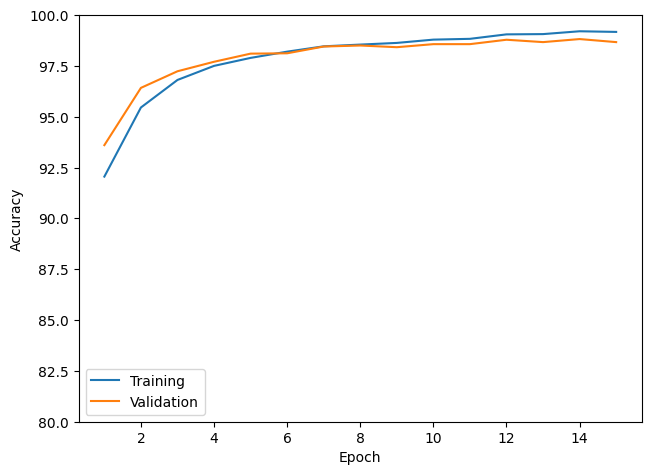

In [18]:
model = LeNet5(gray_scale=True, num_classes=10)

model = model.to(DEVICE)

optimizer = torch.optim.SGD(model.parameters(), lr=0.1)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer,
                                                       factor=0.1,
                                                       mode='max',
                                                       verbose=True)

minibatch_loss_list, train_acc_list, valid_acc_list = train_model(
    model=model,
    num_epochs=NUM_EPOCHS,
    train_loader=train_loader,
    valid_loader=valid_loader,
    test_loader=test_loader,
    optimizer=optimizer,
    device=DEVICE,
    logging_interval=100)

plot_training_loss(minibatch_loss_list=minibatch_loss_list,
                   num_epochs=NUM_EPOCHS,
                   iter_per_epoch=len(train_loader),
                   results_dir=None,
                   averaging_iterations=100)
plt.show()

plot_accuracy(train_acc_list=train_acc_list,
              valid_acc_list=valid_acc_list,
              results_dir=None)
plt.ylim([80, 100])
plt.show()

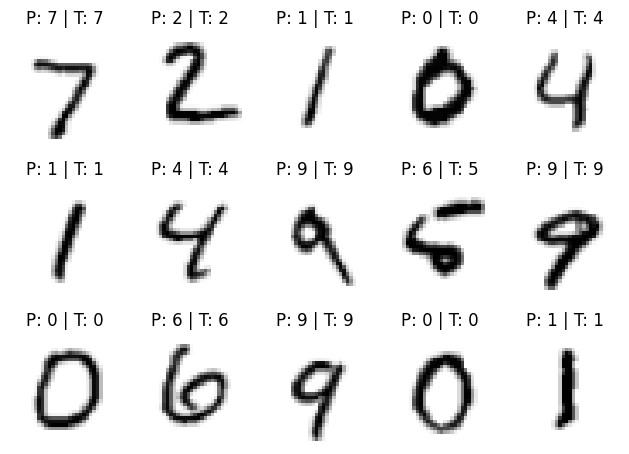

In [21]:
model.cpu()
show_examples(model=model, data_loader=test_loader)

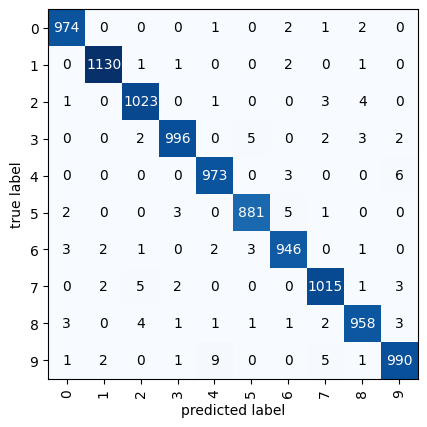

In [24]:
from cnn.helpers.helper_plotting import plot_confusion_matrix
from cnn.helpers.helper_evaluation import compute_confusion_matrix

class_dict = {0: '0',
              1: '1',
              2: '2',
              3: '3',
              4: '4',
              5: '5',
              6: '6',
              7: '7',
              8: '8',
              9: '9'}

mat = compute_confusion_matrix(model=model, data_loader=test_loader, device=torch.device('cpu'))
plot_confusion_matrix(mat, class_names=class_dict.values())
plt.show()

In [19]:
print(torch.backends.mps.is_available())

True


In [22]:
MPS_DEVICE = torch.device("mps")

/Users/rsengupta/Library/Caches/pypoetry/virtualenvs/deeplearning-projects-MVOrQPuQ-py3.11/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:60: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Epoch: 001/015 | Batch 0000/0210 | Loss: 2.3146
Epoch: 001/015 | Batch 0100/0210 | Loss: 0.4547
Epoch: 001/015 | Batch 0200/0210 | Loss: 0.2545
Epoch: 001/015 | Train: 92.78% | Validation: 94.30%
Time elapsed: 0.20 min
Epoch: 002/015 | Batch 0000/0210 | Loss: 0.2245
Epoch: 002/015 | Batch 0100/0210 | Loss: 0.2040
Epoch: 002/015 | Batch 0200/0210 | Loss: 0.1280
Epoch: 002/015 | Train: 95.86% | Validation: 96.93%
Time elapsed: 0.35 min
Epoch: 003/015 | Batch 0000/0210 | Loss: 0.1245
Epoch: 003/015 | Batch 0100/0210 | Loss: 0.1338
Epoch: 003/015 | Batch 0200/0210 | Loss: 0.1013
Epoch: 003/015 | Train: 97.05% | Validation: 97.63%
Time elapsed: 0.50 min
Epoch: 004/015 | Batch 0000/0210 | Loss: 0.0982
Epoch: 004/015 | Batch 0100/0210 | Loss: 0.0787
Epoch: 004/015 | Batch 0200/0210 | Loss: 0.1193
Epoch: 004/015 | Train: 97.41% | Validation: 97.88%
Time elapsed: 0.64 min
Epoch: 005/015 | Batch 0000/0210 | Loss: 0.0717
Epoch: 005/015 | Batch 0100/0210 | Loss: 0.0953
Epoch: 005/015 | Batch 0200/

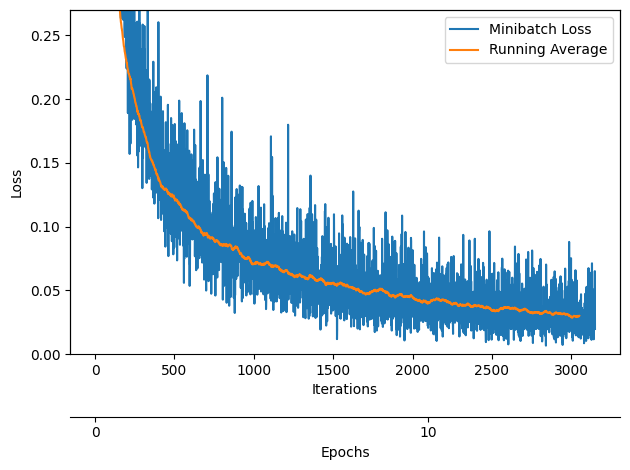

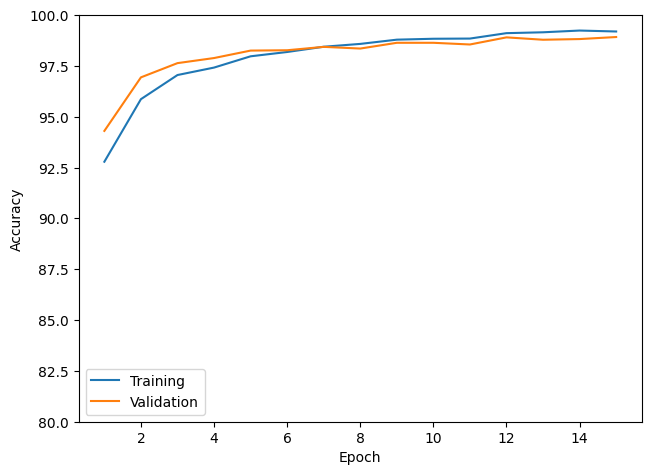

In [23]:
mps_model = LeNet5(gray_scale=True, num_classes=10)

mps_model = mps_model.to(MPS_DEVICE)

optimizer = torch.optim.SGD(mps_model.parameters(), lr=0.1)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer,
                                                       factor=0.1,
                                                       mode='max',
                                                       verbose=True)

minibatch_loss_list, train_acc_list, valid_acc_list = train_model(
    model=mps_model,
    num_epochs=NUM_EPOCHS,
    train_loader=train_loader,
    valid_loader=valid_loader,
    test_loader=test_loader,
    optimizer=optimizer,
    device=MPS_DEVICE,
    logging_interval=100)

plot_training_loss(minibatch_loss_list=minibatch_loss_list,
                   num_epochs=NUM_EPOCHS,
                   iter_per_epoch=len(train_loader),
                   results_dir=None,
                   averaging_iterations=100)
plt.show()

plot_accuracy(train_acc_list=train_acc_list,
              valid_acc_list=valid_acc_list,
              results_dir=None)
plt.ylim([80, 100])
plt.show()